In [1]:
ls

CSV_SST_LR_alg1.csv    IP_change_log.npy      difference_k_appk.npy
CSV_SST_LR_alg1.ipynb  IP_flip_log.npy        exact_ks_IP.npy
Errors_k.ipynb         Plot.ipynb             get_order.ipynb
GC_change.npy          RIF_change.npy         need_reg?.ipynb
GC_flip.npy            RIF_flip.npy           new_pred_k.npy
GD_change.npy          Same.jpg               new_predictions.npy
GD_flip.npy            Smallest_k.ipynb       old_predictions.npy
IF_change_log.npy      Use_approK.ipynb       order_IF.npy
IF_flip_log.npy        appro_ks_IP.npy        pred.npy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

678

In [6]:
np.mean([i for i in app_k if i != None])

247.29793510324484

In [4]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]


0.4927295659604686

In [4]:
for i in range(new_pred_k.shape[0]):
    print("i", i)
    print("nre prediction", new_pred_k[i])

i 0
nre prediction None
i 1
nre prediction 0.5655931235222307
i 2
nre prediction None
i 3
nre prediction None
i 4
nre prediction None
i 5
nre prediction None
i 6
nre prediction None
i 7
nre prediction 0.5430473153779225
i 8
nre prediction 0.18236200976017825
i 9
nre prediction 0.787797364996399
i 10
nre prediction 0.0036688279766718505
i 11
nre prediction 0.2797347054749266
i 12
nre prediction 0.0038134713384033506
i 13
nre prediction 0.012214926580402035
i 14
nre prediction 0.48260830240136077
i 15
nre prediction 0.5108606795585903
i 16
nre prediction 0.6513886752044373
i 17
nre prediction 0.43895249215831306
i 18
nre prediction None
i 19
nre prediction None
i 20
nre prediction 0.5125493356898221
i 21
nre prediction None
i 22
nre prediction 0.3768436975489818
i 23
nre prediction None
i 24
nre prediction None
i 25
nre prediction None
i 26
nre prediction 0.33630775037849747
i 27
nre prediction 0.47599727565985983
i 28
nre prediction 0.511173326481678
i 29
nre prediction 0.48976154150710

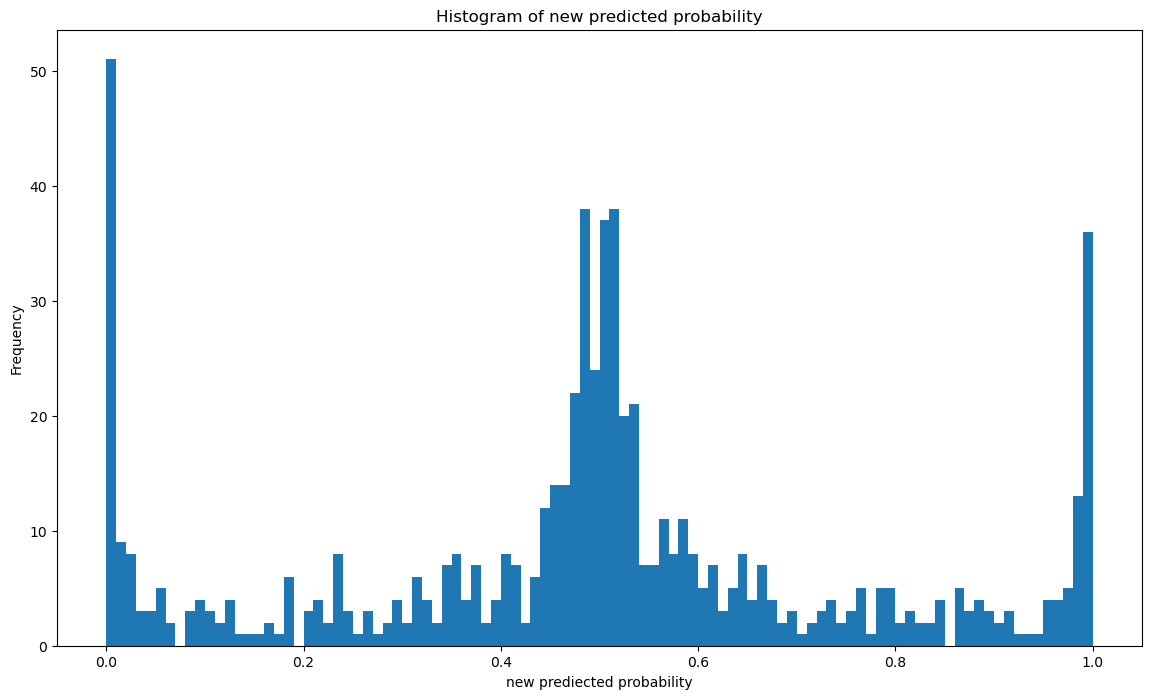

In [5]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

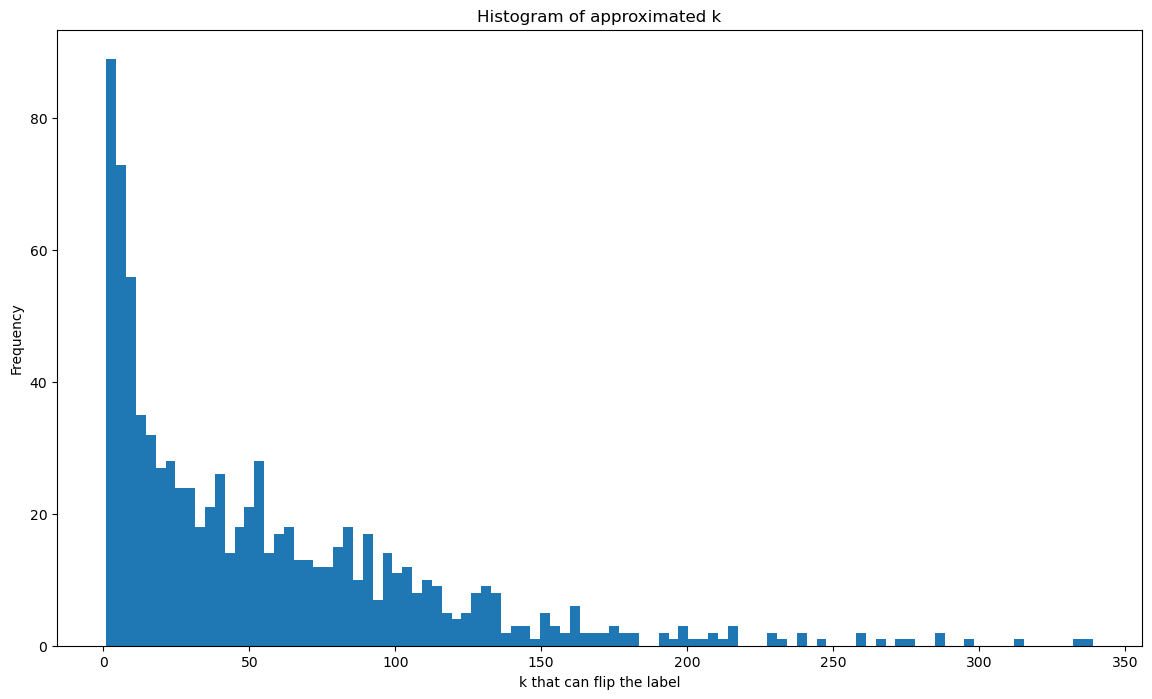

In [6]:
exact_ks = np.load("exact_ks_IP.npy")
app_k_nonon=[app_k[i] for i in range(872) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(exact_ks, bins=100)
plt.xlabel("k that can flip the label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# How many of them is None

In [7]:
np.sum([app_k[i] == None for i in range(872)])

194

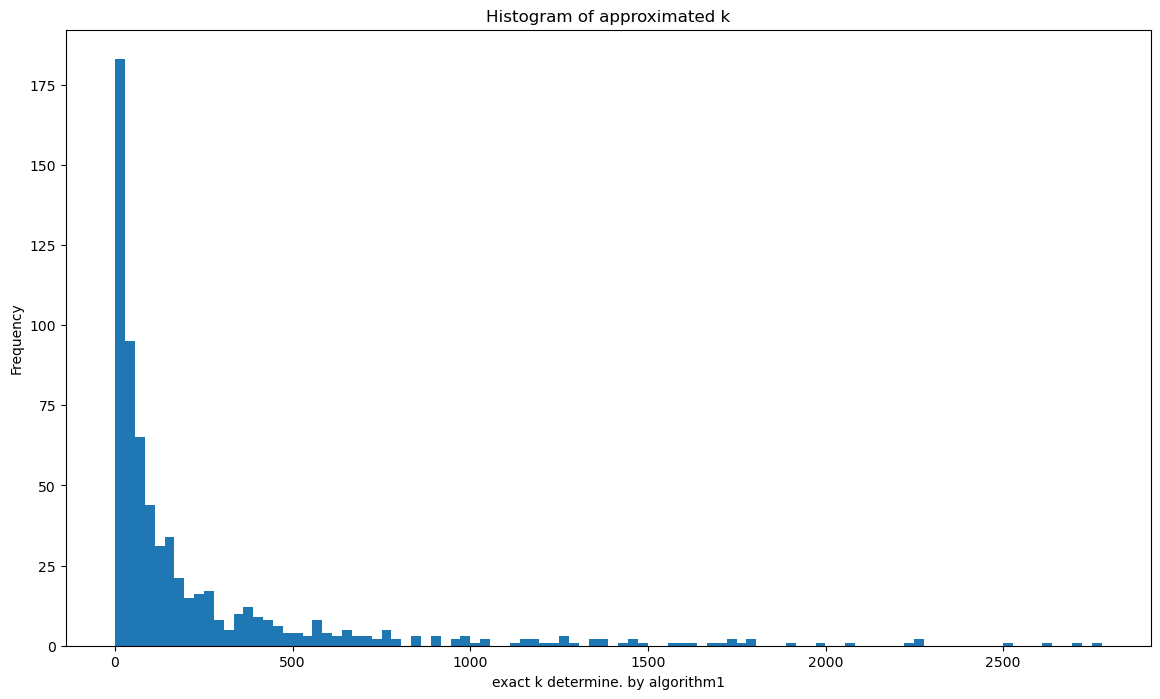

In [8]:
app_k_nonon=[app_k[i] for i in range(872) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

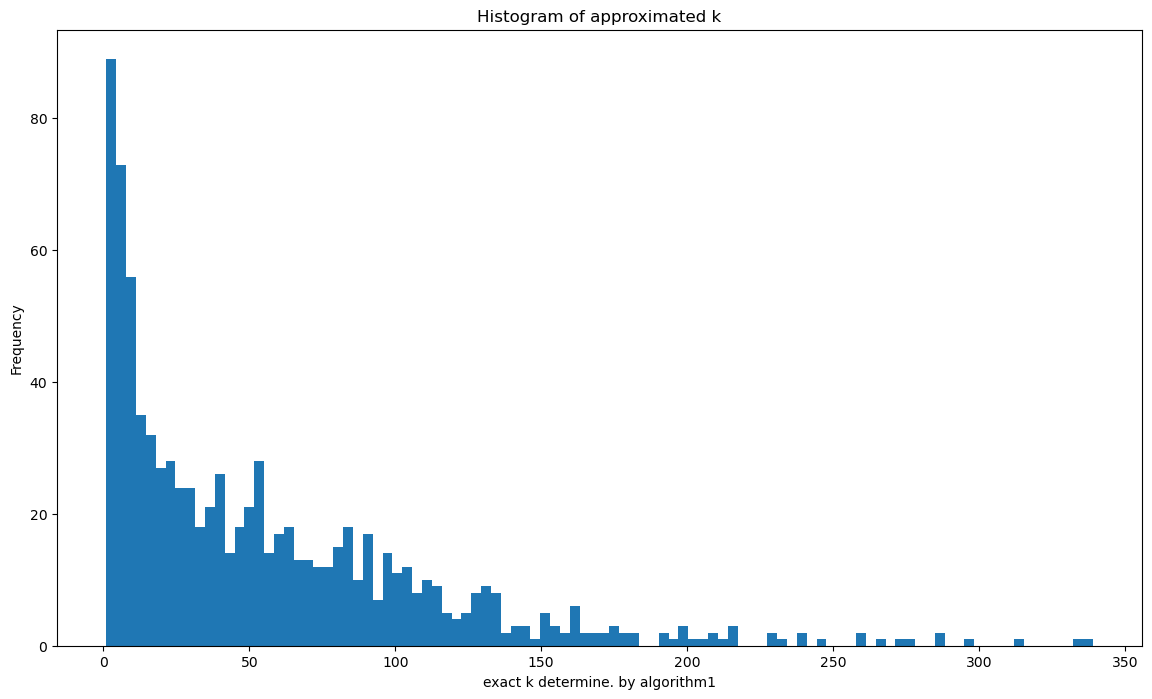

In [9]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(exact_ks, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# For those are not None, how is the flip

In [10]:
flips = np.zeros((872, 1))
diff = np.zeros((872, 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(872):
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.3009748953355743
new 0.5655931235222307
appro k 53
flip label [1.]

old 0.3251752573164711
new 0.5430473153779225
appro k 49
flip label [1.]

old 0.83933264256975
new 0.18236200976017825
appro k 213
flip label [1.]

old 0.1762500981801558
new 0.787797364996399
appro k 172
flip label [1.]

old 0.9126364803188401
new 0.0036688279766718505
appro k 718
flip label [1.]

old 0.8015065499941392
new 0.2797347054749266
appro k 126
flip label [1.]

old 0.9184839859875534
new 0.0038134713384033506
appro k 435
flip label [1.]

old 0.8969403435074316
new 0.012214926580402035
appro k 580
flip label [1.]

old 0.6017979373124086
new 0.48260830240136077
appro k 20
flip label [1.]

old 0.43179168125496964
new 0.5108606795585903
appro k 18
flip label [1.]

old 0.235730590824697
new 0.6513886752044373
appro k 142
flip label [1.]

old 0.6928382384707765
new 0.43895249215831306
appro k 54
flip label [1.]

old 0.4519091637268931
new 0.5125493356898221
appro k 10
flip label [1.]

old 0.7418305781086879


In [11]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(872)])
num_flip

678

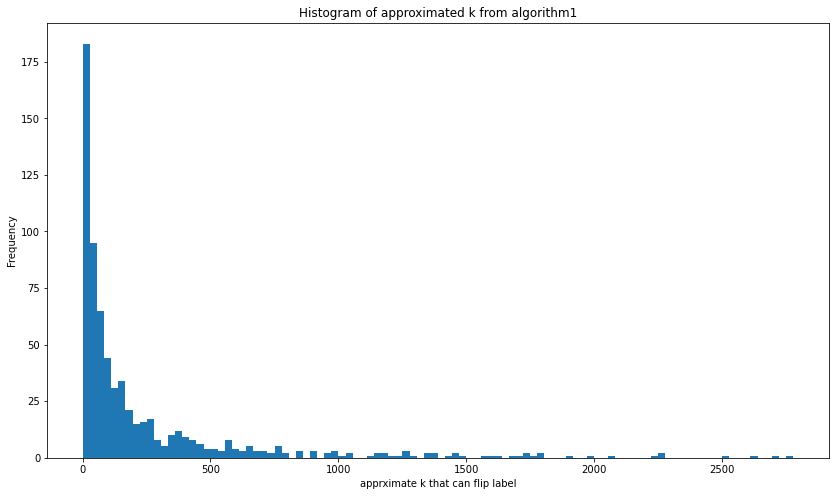

In [33]:

flip_idx = [i for i in range(872) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [34]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(872)])
num_noflip

0

In [35]:
num_nok = np.sum([flips[i] == 2 for i in range(872)])
num_nok

194

In [36]:
# diff for those flip the lable
diff1=[diff[i] for i in range(872) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.1971283124420303, 0.03428614788616164)

In [37]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(872) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(nan, nan)

In [38]:
index0 = [i for i in range(872) if flips[i] == 0]

In [39]:
for i in index0:
    print("old", pred[i])
    print("new", new_pred_k[i])
    print("appro k", app_k[i])
    print("exact k", exact_ks[i])
    print()

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'